# Project Aim
This project aims to find the most accurate method of predicting rental bike sharing's demand using the Bike Sharing Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

# Business case

Rental services are paid, so as a rental service company, one of your concerns is customer satisfaction. Predicting bike rental demand helps adjust supply, especially if it can be done a few days in advance. The big problem with early prediction is that it converges to the task of predicting weather, a task which is notoriously difficult. That aside, making sure customers have a bike available when they need it ensures they are satisfied with the service and will therefore avoid any bad reviews and maintain reputation.

# Tools and Technologies used

The programming language used in this project is Python . The following libraries were used for data analysis and data visualization.

Pandas : For loading the dataset and performing data wrangling

Matplotlib: For data visualization.

Seaborn: For data visualization.

NumPy: For some math operations in predictions.

Statsmodels: For statistical computations

# Attribute Information: 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week (Sun-0 to Sat-6)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing Standard libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

* pandas - used to perform data manipulation and analysis

* numpy - used to perform a wide variety of mathematical operations on arrays

* matplotlib - used for data visualization and graphical plotting

* seaborn - built on top of matplotlib with similar functionalities

* %matplotlib - to enable the inline plotting.

* warnings - to manipulate warnings details 

* filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

* max-columns is to display all the features.

# Loading the Dataset

In [2]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 1. Inspecting the dataframe

In [3]:
# Check the summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
# Check the number of rows and columns in the dataframe
df.shape

(17379, 17)

# Initial Observations from data:-
The maximum number of bikes rented was 977

On Average people are renting 189 bikes throught the duration mentioned.

There are no null values present in the dataset.

In [5]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Let us check for NULL values in the dataset.

In [6]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2. Data Cleaning and Analysis

In [9]:
#Changing the season, weathersit, mnth, weekday columns from numerical values to categorical strings
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.weathersit=df.weathersit.map({1:'Clear Day', 2:'Mist + Cloudy', 3:'Light Snow / Rain', 4:'Heavy Show / Rain'})
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,0,Sat,0,Clear Day,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,Jan,1,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,Jan,2,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,Jan,3,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,Jan,4,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(17379, 16)

In [11]:
#Inserting a new variable day in the dataframe.
df.insert(4,'day','')
df['day']=pd.DatetimeIndex(df['dteday']).day
df.head()

,dteday,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,0,Jan,1,0,0,Sat,0,Clear Day,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,spring,0,Jan,1,1,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,spring,0,Jan,1,2,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,spring,0,Jan,1,3,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,spring,0,Jan,1,4,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
print('------------------day values------------------')
print(df.day.value_counts())
print('--------------workingday values---------------')
print(df.workingday.value_counts())
print('----------------weekday values----------------')
print(df.weekday.value_counts())

------------------day values------------------
day
1     575
5     575
17    575
9     575
13    574
21    574
20    574
19    574
15    574
14    574
16    574
8     574
7     574
4     574
12    573
23    573
2     573
3     573
24    573
10    572
25    572
6     572
22    569
11    568
26    567
18    563
28    563
27    552
29    526
30    514
31    336
Name: count, dtype: int64
--------------workingday values---------------
workingday
1    11865
0     5514
Name: count, dtype: int64
----------------weekday values----------------
weekday
Sat    2512
Sun    2502
Fri    2487
Mon    2479
Wed    2475
Thu    2471
Tue    2453
Name: count, dtype: int64


In [13]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(17379, 16)

# Visualization

# 2.1 Univariate Analysis

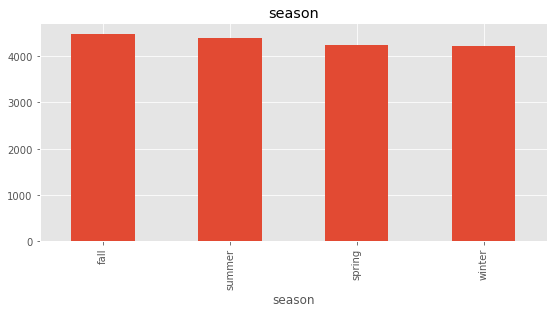

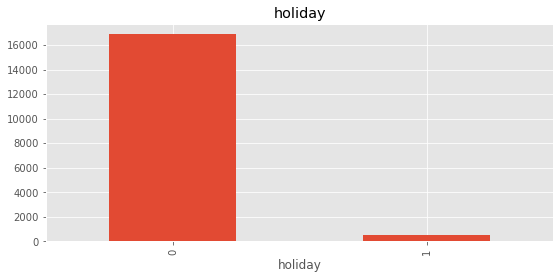

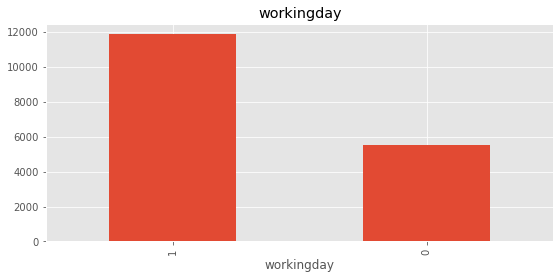

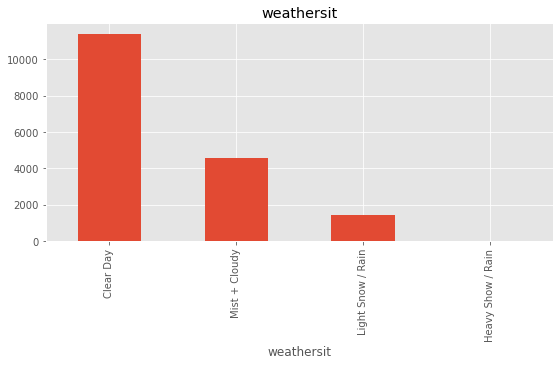

In [14]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [15]:
print('Number of holidays in 2011: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2012: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2011:  239
Number of holidays in 2012:  261


Inferences:

1. Even though the margin is minimum, the number of days in fall is maximum and winter is minimum. Number of days as per season in decreasing order: Fall, Summer, Spring, Winter.

2. The number of public holidays is 500 in 2 years. Number of holidays in 2011 and 2012 are 239 and 261 respectively

3. The number of non-working days(Public holidays+weekends) is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.

4. Weather situation is mostly Clear Day case scenario and Mist+Cloudy compared to Light Snow/Rain and Heavy Snow/Rain.

In [16]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Histogram grid analysis

Assessing how our features are distributed to get an idea of each variable's meaning in the context of bike rentals and look for possible outliers.
Here we can assess what type of distribution each feature has (uniform, normal, exponential, etc.) and what variability we are dealing with.

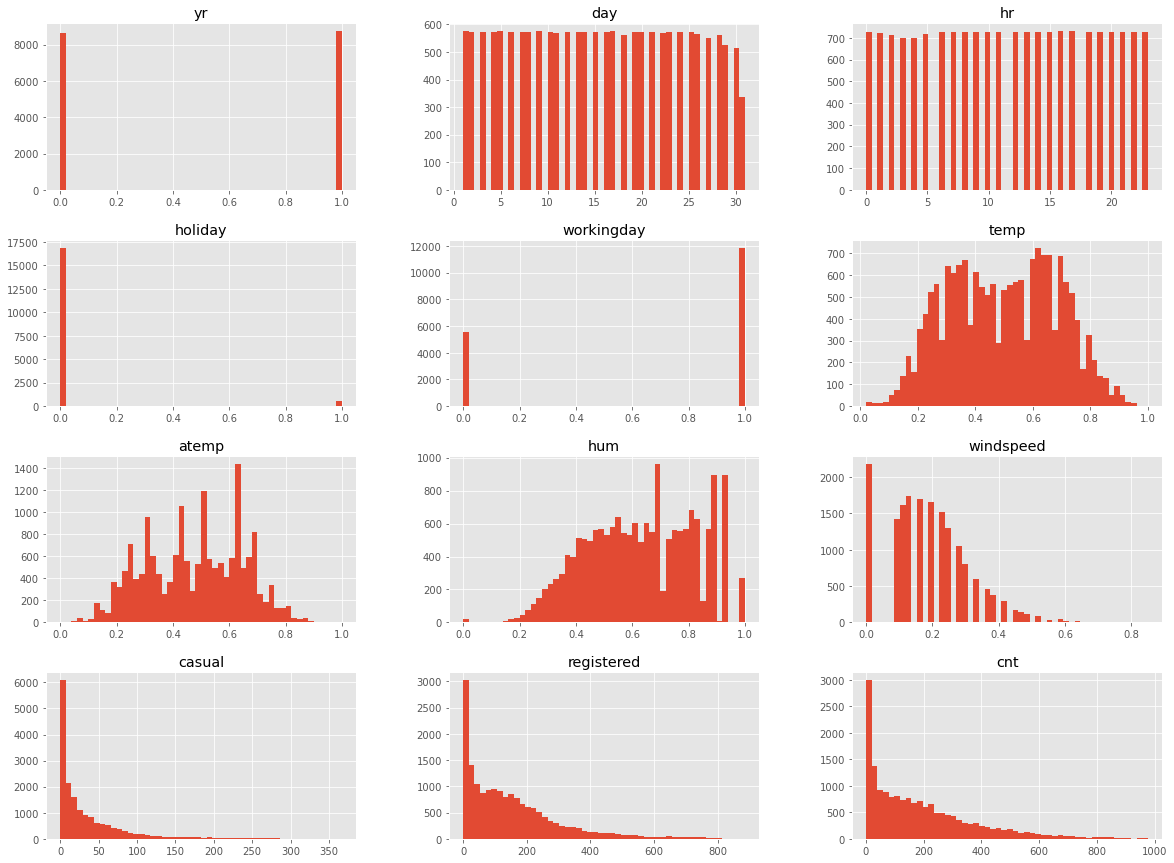

In [17]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Inferences:

1. Values of temperature and feeling temperature (atemp) are differently distributed.

2. Humidity is almost randomly distributed.

3. The KDE of windspeed is not a normal distribution but has  a right skew distribution.

4. The spread of casual users is not normally distributed, instead is right skewed also, that of registered users is right skew distribution ultimately leading to cnt to be right skewed.

# 2.2 Bivariate Analysis

In [18]:
# Let us explore the graph in terms of months.

[Text(0.5, 1.0, 'Count of bikes during different months')]

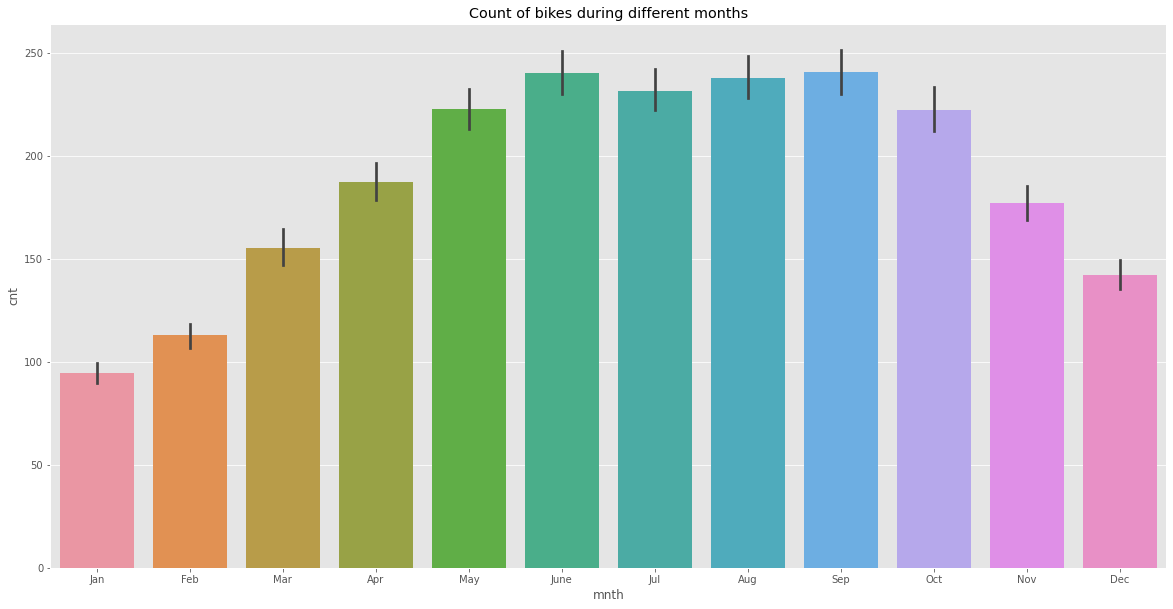

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

Over a period of time, the number of users increases and gradually, the number of users decreases.

In [20]:
# Let us explore the graph in terms of weekdays.

[Text(0.5, 1.0, 'Count of bikes during different days')]

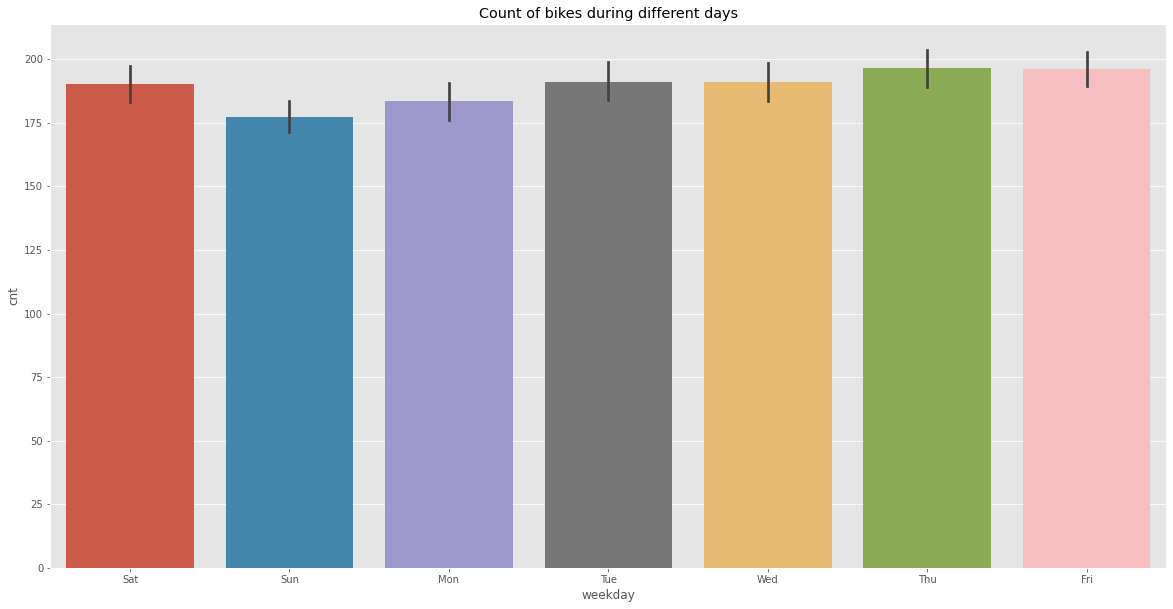

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

In this graph, we observe an average number of users throughout the week.

Thus, the average distribution is impractical for predictions

In [22]:
# Regression plot of temperature and humidity with respect to count.

[Text(0.5, 1.0, 'Relation between humidity and users')]

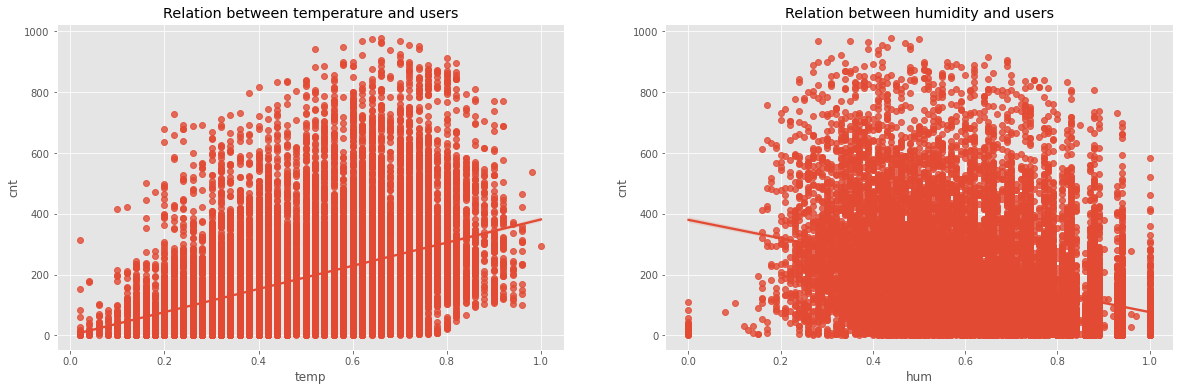

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

With the increase in temperature, the number of user increases.

When the humidity increases the number of users decreases.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   day         17379 non-null  int32  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int32(1), int64(7), object(4)
memory usage: 2.1+ MB


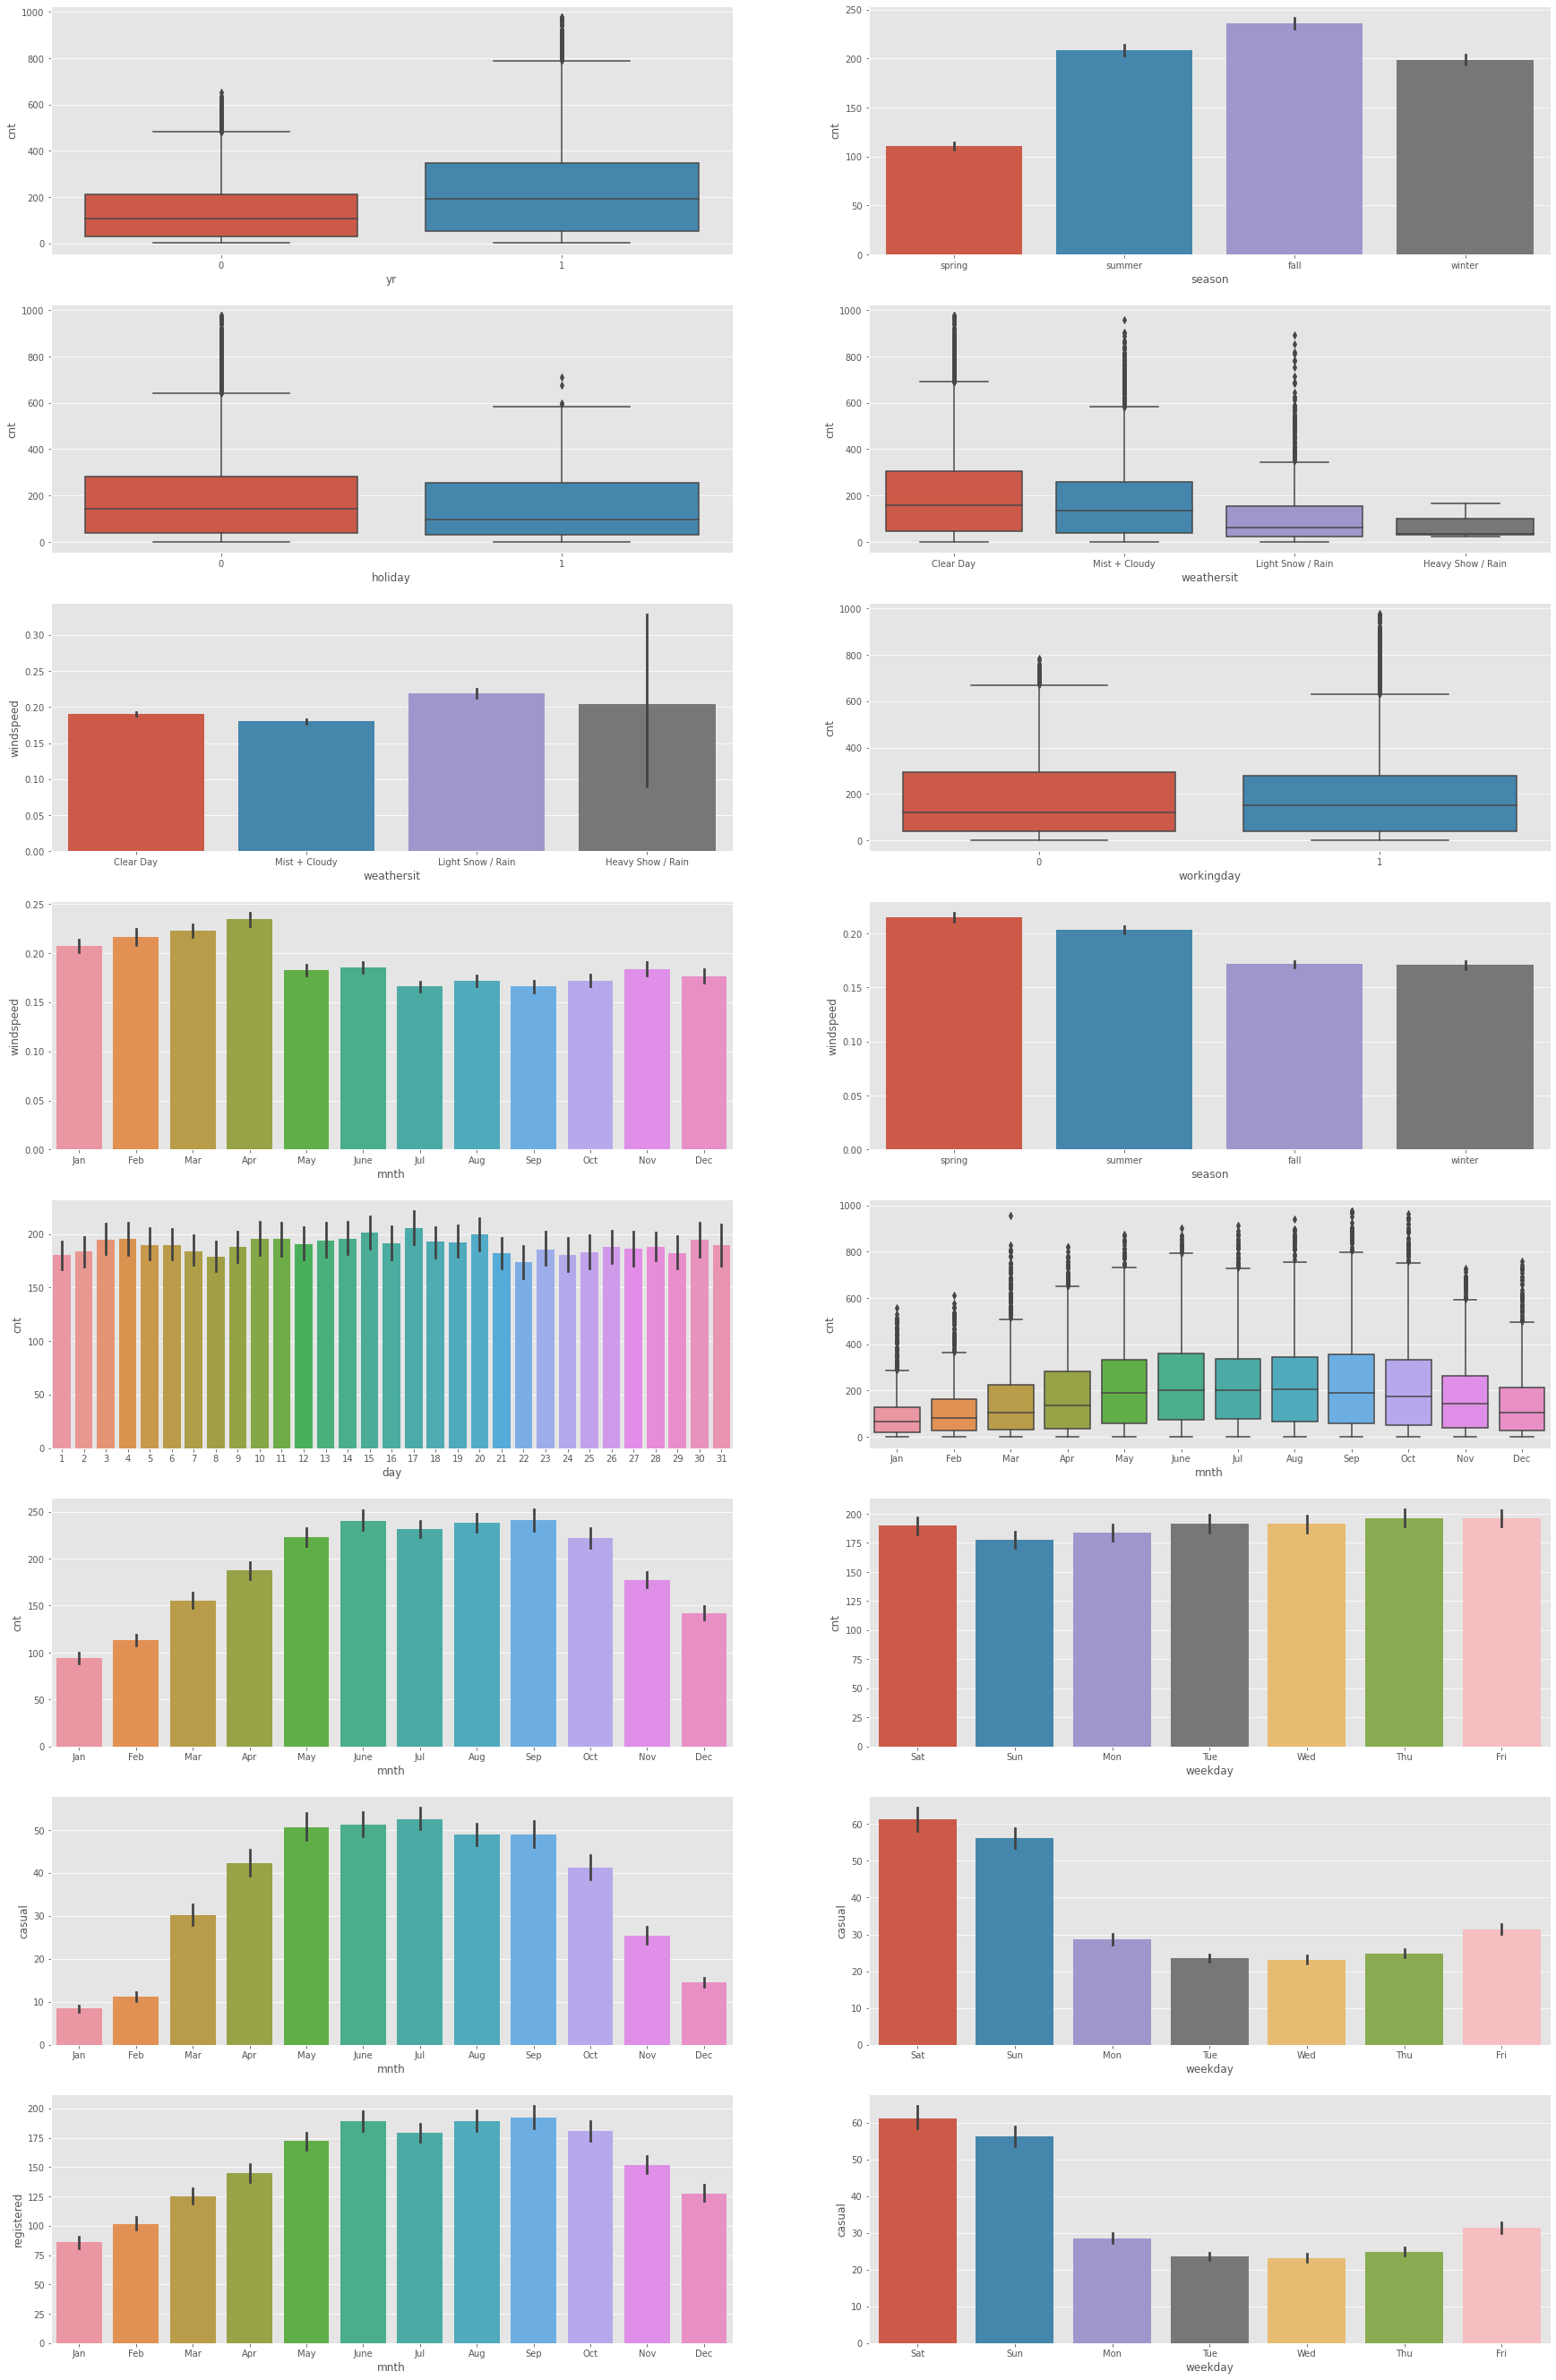

In [25]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,9)
sns.barplot(x='day', y='cnt', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()

In [26]:
print('------------Winter Months-------------------------')
print('Months')
print(df[df['season']=='winter'].mnth.value_counts())
print('------------Spring Months-------------------------')
print('Months')
print(df[df['season']=='spring'].mnth.value_counts())
print('------------Summer Months-------------------------')
print('Months')
print(df[df['season']=='summer'].mnth.value_counts())
print('--------------Fall Months-------------------------')
print('Months')
print(df[df['season']=='fall'].mnth.value_counts())

------------Winter Months-------------------------
Months
mnth
Oct    1451
Nov    1437
Dec     960
Sep     384
Name: count, dtype: int64
------------Spring Months-------------------------
Months
mnth
Jan    1429
Feb    1341
Mar     949
Dec     523
Name: count, dtype: int64
------------Summer Months-------------------------
Months
mnth
May     1488
Apr     1437
June     960
Mar      524
Name: count, dtype: int64
--------------Fall Months-------------------------
Months
mnth
Jul     1488
Aug     1475
Sep     1053
June     480
Name: count, dtype: int64


Inferences

1. The cnt in the year 2012 was way more than that in 2011. 

2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.

3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.

4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week.

5. The average count of bikes rented when the weather is situation is 'Clear' or 'Mist + Cloudy' is much more compared to other situations - Wind speed during the bad weather situations (light snow/rain and heavy snow/rain) is more than 'Clear' and 'Mist + Cloudy' weather situations and hence more number of bikes are rented in such situations.

6. There was a drop of bike rents by casual users in the winters and in the first 2 months of spring and less drop in the registered users. These people may be regular office going people or fitness enthusiasts.

Also, by looking at a sample of the dataset it seems like column casual + registered = count

Now we'll test wether casual + registered equals count or not.

In [27]:
test_count = df['casual'] + df['registered'] == df['cnt']
assert test_count.sum() == len(test_count)

there is no assertion error. Hence proved that casual + registered = cnt

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [28]:
df_new=df.copy()

In [29]:
df_new = df_new[['yr','day','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']]
df_new.head()

,yr,day,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,0,1,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,0,1,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,0,1,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,0,1,0,0,0.24,0.2879,0.75,0.0,0,1,1


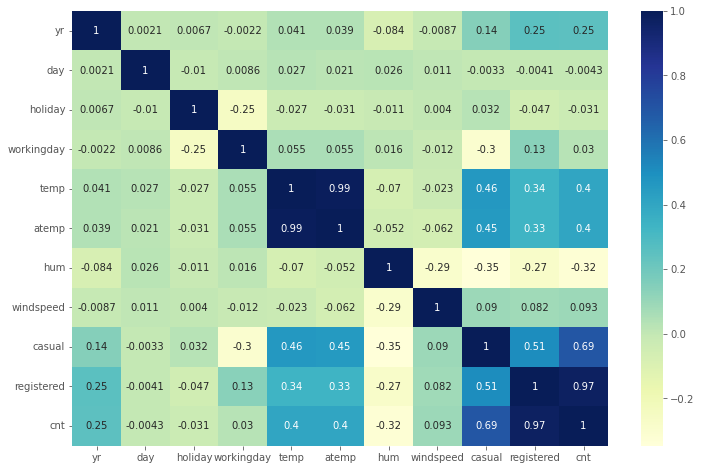

In [30]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them from original dataframe df since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [31]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,1,0,0,Sat,0,Clear Day,0.24,0.2879,0.81,0.0,16
1,spring,0,Jan,1,1,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,40
2,spring,0,Jan,1,2,0,Sat,0,Clear Day,0.22,0.2727,0.80,0.0,32
3,spring,0,Jan,1,3,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,13
4,spring,0,Jan,1,4,0,Sat,0,Clear Day,0.24,0.2879,0.75,0.0,1


Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [32]:
df=df.drop('atemp',axis=1)

In [33]:
df.head()

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,1,0,0,Sat,0,Clear Day,0.24,0.81,0.0,16
1,spring,0,Jan,1,1,0,Sat,0,Clear Day,0.22,0.80,0.0,40
2,spring,0,Jan,1,2,0,Sat,0,Clear Day,0.22,0.80,0.0,32
3,spring,0,Jan,1,3,0,Sat,0,Clear Day,0.24,0.75,0.0,13
4,spring,0,Jan,1,4,0,Sat,0,Clear Day,0.24,0.75,0.0,1


# Preparing X and Y variables

In [34]:
X = df.drop(columns=['cnt'],axis=1)

In [35]:
X.head()

,season,yr,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,spring,0,Jan,1,0,0,Sat,0,Clear Day,0.24,0.81,0.0
1,spring,0,Jan,1,1,0,Sat,0,Clear Day,0.22,0.80,0.0
2,spring,0,Jan,1,2,0,Sat,0,Clear Day,0.22,0.80,0.0
3,spring,0,Jan,1,3,0,Sat,0,Clear Day,0.24,0.75,0.0
4,spring,0,Jan,1,4,0,Sat,0,Clear Day,0.24,0.75,0.0


In [36]:
y = df['cnt']

In [37]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

# 3. Preparing data for modelling

In [38]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [39]:
X = preprocessor.fit_transform(X)

In [40]:
X.shape

(17379, 35)

In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13903, 35), (3476, 35))

In [42]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Create an Evaluate Function to give all metrics after model Training

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Support Vector Regressor": SVR()
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 140.4181
- Mean Absolute Error: 105.1512
- R2 Score: 0.4061
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136.8944
- Mean Absolute Error: 103.1771
- R2 Score: 0.4082


Lasso
Model performance for Training set
- Root Mean Squared Error: 140.9663
- Mean Absolute Error: 105.3296
- R2 Score: 0.4015
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 137.5866
- Mean Absolute Error: 103.4415
- R2 Score: 0.4022


Ridge
Model performance for Training set
- Root Mean Squared Error: 140.4181
- Mean Absolute Error: 105.1502
- R2 Score: 0.4061
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 136.8967
- Mean Absolute Error: 103.1802
- R2 Score: 0.4082


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 101.9306
- Mean Absolute Error: 68.7233
- R2 Score: 0.6

# Results

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.956780
6,XGBRegressor,0.951295
5,Random Forest Regressor,0.944529
10,Bagging Regressor,0.939350
4,Decision Tree,0.880642
9,Gradient Boosting Regressor,0.864879
8,AdaBoost Regressor,0.619874
3,K-Neighbors Regressor,0.501847
0,Linear Regression,0.408185
2,Ridge,0.408165


# CatBoostRegressor

In [46]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.062057
0:	learn: 175.3729842	total: 5.31ms	remaining: 5.3s
1:	learn: 168.4924454	total: 10.9ms	remaining: 5.43s
2:	learn: 162.2891120	total: 15.8ms	remaining: 5.24s
3:	learn: 156.7037896	total: 20.7ms	remaining: 5.16s
4:	learn: 151.6206013	total: 26.3ms	remaining: 5.22s
5:	learn: 146.8363277	total: 31.3ms	remaining: 5.19s
6:	learn: 142.2207789	total: 36.2ms	remaining: 5.14s
7:	learn: 138.5351430	total: 41.3ms	remaining: 5.12s
8:	learn: 133.7304418	total: 46.2ms	remaining: 5.08s
9:	learn: 130.5639184	total: 51.1ms	remaining: 5.06s
10:	learn: 127.3307754	total: 56ms	remaining: 5.03s
11:	learn: 124.5454820	total: 61ms	remaining: 5.02s
12:	learn: 120.9648895	total: 66ms	remaining: 5.01s
13:	learn: 118.6444635	total: 71ms	remaining: 5s
14:	learn: 116.0928671	total: 76.5ms	remaining: 5.03s
15:	learn: 113.6790367	total: 82.5ms	remaining: 5.08s
16:	learn: 111.2106340	total: 88.6ms	remaining: 5.12s
17:	learn: 109.2042610	total: 94ms	remaining: 5.13s
18:	learn: 105.9376110

166:	learn: 48.1955293	total: 878ms	remaining: 4.38s
167:	learn: 48.1463539	total: 883ms	remaining: 4.38s
168:	learn: 48.1076181	total: 888ms	remaining: 4.37s
169:	learn: 48.0462366	total: 894ms	remaining: 4.37s
170:	learn: 47.9752259	total: 899ms	remaining: 4.36s
171:	learn: 47.8948444	total: 905ms	remaining: 4.36s
172:	learn: 47.8163176	total: 913ms	remaining: 4.37s
173:	learn: 47.7707621	total: 919ms	remaining: 4.36s
174:	learn: 47.7403173	total: 926ms	remaining: 4.36s
175:	learn: 47.6645479	total: 931ms	remaining: 4.36s
176:	learn: 47.6336363	total: 936ms	remaining: 4.35s
177:	learn: 47.5833038	total: 942ms	remaining: 4.35s
178:	learn: 47.4792486	total: 947ms	remaining: 4.34s
179:	learn: 47.4309686	total: 952ms	remaining: 4.34s
180:	learn: 47.3745380	total: 957ms	remaining: 4.33s
181:	learn: 47.3152266	total: 963ms	remaining: 4.33s
182:	learn: 47.2036279	total: 968ms	remaining: 4.32s
183:	learn: 47.1255453	total: 974ms	remaining: 4.32s
184:	learn: 47.0633631	total: 979ms	remaining:

336:	learn: 40.6984008	total: 1.79s	remaining: 3.52s
337:	learn: 40.6769805	total: 1.79s	remaining: 3.52s
338:	learn: 40.6476396	total: 1.8s	remaining: 3.51s
339:	learn: 40.6071001	total: 1.81s	remaining: 3.51s
340:	learn: 40.5836948	total: 1.81s	remaining: 3.5s
341:	learn: 40.5632657	total: 1.82s	remaining: 3.5s
342:	learn: 40.5285600	total: 1.82s	remaining: 3.49s
343:	learn: 40.5264057	total: 1.83s	remaining: 3.49s
344:	learn: 40.5078562	total: 1.83s	remaining: 3.48s
345:	learn: 40.4779434	total: 1.84s	remaining: 3.48s
346:	learn: 40.4749013	total: 1.84s	remaining: 3.47s
347:	learn: 40.4694206	total: 1.85s	remaining: 3.47s
348:	learn: 40.4527437	total: 1.85s	remaining: 3.46s
349:	learn: 40.4301793	total: 1.86s	remaining: 3.46s
350:	learn: 40.4269631	total: 1.86s	remaining: 3.45s
351:	learn: 40.3986497	total: 1.87s	remaining: 3.44s
352:	learn: 40.3920338	total: 1.88s	remaining: 3.44s
353:	learn: 40.3664264	total: 1.88s	remaining: 3.43s
354:	learn: 40.3234229	total: 1.89s	remaining: 3.

510:	learn: 37.1407303	total: 2.69s	remaining: 2.57s
511:	learn: 37.1226530	total: 2.69s	remaining: 2.57s
512:	learn: 37.1065262	total: 2.7s	remaining: 2.56s
513:	learn: 37.0873578	total: 2.7s	remaining: 2.56s
514:	learn: 37.0690886	total: 2.71s	remaining: 2.55s
515:	learn: 37.0406924	total: 2.71s	remaining: 2.55s
516:	learn: 37.0269215	total: 2.72s	remaining: 2.54s
517:	learn: 37.0042073	total: 2.73s	remaining: 2.54s
518:	learn: 36.9884458	total: 2.73s	remaining: 2.53s
519:	learn: 36.9753062	total: 2.74s	remaining: 2.52s
520:	learn: 36.9494626	total: 2.74s	remaining: 2.52s
521:	learn: 36.9326637	total: 2.75s	remaining: 2.52s
522:	learn: 36.9296419	total: 2.75s	remaining: 2.51s
523:	learn: 36.9176232	total: 2.76s	remaining: 2.5s
524:	learn: 36.9020394	total: 2.76s	remaining: 2.5s
525:	learn: 36.8844184	total: 2.77s	remaining: 2.49s
526:	learn: 36.8641394	total: 2.77s	remaining: 2.49s
527:	learn: 36.8459072	total: 2.78s	remaining: 2.48s
528:	learn: 36.8103223	total: 2.78s	remaining: 2.4

685:	learn: 34.2009871	total: 3.6s	remaining: 1.65s
686:	learn: 34.1931018	total: 3.6s	remaining: 1.64s
687:	learn: 34.1687565	total: 3.61s	remaining: 1.64s
688:	learn: 34.1540593	total: 3.61s	remaining: 1.63s
689:	learn: 34.1341634	total: 3.62s	remaining: 1.63s
690:	learn: 34.1248970	total: 3.62s	remaining: 1.62s
691:	learn: 34.1076777	total: 3.63s	remaining: 1.62s
692:	learn: 34.0908783	total: 3.64s	remaining: 1.61s
693:	learn: 34.0809081	total: 3.64s	remaining: 1.6s
694:	learn: 34.0722106	total: 3.65s	remaining: 1.6s
695:	learn: 34.0503939	total: 3.65s	remaining: 1.59s
696:	learn: 34.0370388	total: 3.66s	remaining: 1.59s
697:	learn: 34.0284311	total: 3.66s	remaining: 1.58s
698:	learn: 34.0138255	total: 3.67s	remaining: 1.58s
699:	learn: 34.0112381	total: 3.67s	remaining: 1.57s
700:	learn: 34.0037087	total: 3.68s	remaining: 1.57s
701:	learn: 33.9895095	total: 3.68s	remaining: 1.56s
702:	learn: 33.9893204	total: 3.69s	remaining: 1.56s
703:	learn: 33.9766292	total: 3.69s	remaining: 1.5

863:	learn: 32.1685498	total: 4.52s	remaining: 712ms
864:	learn: 32.1566047	total: 4.53s	remaining: 707ms
865:	learn: 32.1470476	total: 4.53s	remaining: 701ms
866:	learn: 32.1397000	total: 4.54s	remaining: 696ms
867:	learn: 32.1270759	total: 4.54s	remaining: 691ms
868:	learn: 32.1235004	total: 4.55s	remaining: 686ms
869:	learn: 32.1123113	total: 4.56s	remaining: 681ms
870:	learn: 32.0896495	total: 4.56s	remaining: 676ms
871:	learn: 32.0713892	total: 4.57s	remaining: 671ms
872:	learn: 32.0698978	total: 4.57s	remaining: 665ms
873:	learn: 32.0561526	total: 4.58s	remaining: 660ms
874:	learn: 32.0476836	total: 4.58s	remaining: 655ms
875:	learn: 32.0334198	total: 4.59s	remaining: 650ms
876:	learn: 32.0230532	total: 4.59s	remaining: 644ms
877:	learn: 32.0159924	total: 4.6s	remaining: 639ms
878:	learn: 32.0039542	total: 4.61s	remaining: 634ms
879:	learn: 31.9876353	total: 4.61s	remaining: 629ms
880:	learn: 31.9749936	total: 4.62s	remaining: 623ms
881:	learn: 31.9647763	total: 4.62s	remaining: 

# Plot y_pred and y_test

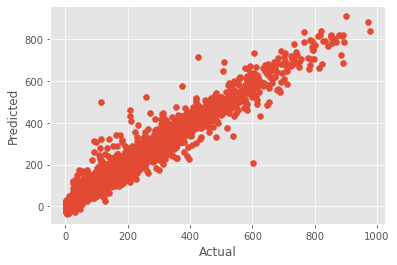

In [47]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Difference between Actual and Predicted Values

In [48]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
12830,425,444.415399,-19.415399
8688,88,89.135412,-1.135412
7091,4,7.536668,-3.536668
12230,526,535.392708,-9.392708
431,13,11.537320,1.462680
...,...,...,...
6759,17,20.370763,-3.370763
13989,85,62.204038,22.795962
173,98,95.091530,2.908470
16192,266,370.300499,-104.300499
